In [40]:
import numpy as np
import gymnasium as gym

In [41]:
# We have continuous action, observation space

# Action space: Box(-1.0, 1.0, (1,), float32)
# Action space have 1 interval: 
# 1. [-1.0, 1.0] - force applied to the car

# Observation space: Box([-1.2 -0.07], [0.6 0.07], (2,), float32)
# Observation space have 2 invervals:
# 1. [-1.2, 0.6] - position of the car along the x-axis
# 2. [-0.07, 0.07] - velocity of the car 


In [51]:
# need to discretize the action and observation (position and velocity) spaces

action_space_steps = 5
observation_space_steps = 20

action_space = np.linspace(-1.0, 1.0, action_space_steps)

# observation space is created by 2 intervals 
position_space = np.linspace(-1.2, 0.6, observation_space_steps)
velocity_space = np.linspace(-0.07, 0.07, observation_space_steps)


In [52]:
def get_state(observation):
    """
    Discretize the continuous observation into discrete state
    State is a tuple of 2 elements: position and velocity
    """
    
    position, velocity = observation
    
    position_bin = np.digitize(position, position_space)
    velocity_bin = np.digitize(velocity, velocity_space)
    
    return (position_bin, velocity_bin)

In [53]:
def max_action_index(Q, state, action_space):
    """
    Return the index of the action_space with the highest Q-value
    """
    values = np.array([Q[state, a] for a in range(len(action_space))])
    action_index = np.argmax(values)
    
    return action_index

In [54]:
env = gym.make("MountainCarContinuous-v0", render_mode=None)

In [55]:
# Example of discretizin
observation, info = env.reset()
print("Observation: ", observation)
print("State: ", get_state(observation))


Observation:  [-0.5114506  0.       ]
State:  (8, 10)


In [56]:
# hyperparameters
gamma = 0.99   # discount factor (how much we value future rewards)
alpha = 0.1   # learning rate
epsilon = 0.5 # probability of choosing a random action


In [60]:
# Create Q-table
def create_Q_table(observation_space_steps, action_space_steps):
    # combine position and velocity into a single state
    states = []
    
    for position in range(observation_space_steps + 1):
        for velocity in range(observation_space_steps + 1):
            states.append((position, velocity))
    
    # Q-table, we will have a dictionary with state-action pairs
    Q_table = {}
    
    for state in states:
        for action in range(action_space_steps + 1):
            Q_table[state, action] = 0
    
    
    print(len(Q_table))
    print(Q_table)
    
    return Q_table


In [68]:
# Training the agent

n_episodes = 10000
score = 0
Q_table = create_Q_table(observation_space_steps, action_space_steps)

scores = []
steps = []


for episode in range(n_episodes):
    
    done = False
    truncated = False
    
    # reset env, get initial state
    observation, info = env.reset()
    state = get_state(observation)
    
    
    episode_score = 0
    episode_steps = 0
    
    while not done:
        
        # 1. Choose action based on epsilon-greedy policy
        # if random number is less than epsilon, choose random action
        # otherwise choose action with the highest Q-value by calling max_action function
        
        if np.random.random() < epsilon:
            action_value  = np.random.choice(action_space)
            action_index = np.digitize(action_value, action_space)
            
            # print("Random action: ", action_value)
        else:
            action_index = max_action_index(Q_table, state, action_space)
            action_value= action_space[action_index]
            
            # print("Action with highest Q-value: ", action_value)
        

        # 2. Take action (converted from scalar to (1, ) shape), observe new state and reward, summarize episode score, get new action
        observation_, reward, done, truncated, info = env.step( [action_value] )
        state_ = get_state(observation_)
        
        action_index_ = max_action_index(Q_table, state_, action_space)
        action_value_ = action_space[action_index_]
        
        episode_score += reward
        
        # 3. Update Q-value
        # Q(s, a) = Q(s, a) + alpha * (reward + gamma * max(Q(s_, a)) - Q(s, a))
        
        Q_table[state, action_index] = Q_table[state, action_index] + alpha * (reward + gamma * Q_table[state_, action_index_] - Q_table[state, action_index])
        
        # 4. Update state
        state = state_
        
        episode_steps += 1
    
    scores.append(episode_score)
    steps.append(episode_steps)
        
        
    
    print("Episode: ", episode)
    print("Score: ", episode_score)
    print("Steps: ", episode_steps)
    print('+++++++++++++++++++++++++++++++')

print("Training finished", n_episodes, "episodes")
average_score = sum(scores) / n_episodes
average_steps = sum(steps) / n_episodes
print("Average score: ", average_score)
print("Average steps: ", average_steps)
best_score = max(scores)
print("Best score: ", best_score)
best_steps = min(steps)
print("Best steps: ", best_steps)

    
        
        
    

2646
{((0, 0), 0): 0, ((0, 0), 1): 0, ((0, 0), 2): 0, ((0, 0), 3): 0, ((0, 0), 4): 0, ((0, 0), 5): 0, ((0, 1), 0): 0, ((0, 1), 1): 0, ((0, 1), 2): 0, ((0, 1), 3): 0, ((0, 1), 4): 0, ((0, 1), 5): 0, ((0, 2), 0): 0, ((0, 2), 1): 0, ((0, 2), 2): 0, ((0, 2), 3): 0, ((0, 2), 4): 0, ((0, 2), 5): 0, ((0, 3), 0): 0, ((0, 3), 1): 0, ((0, 3), 2): 0, ((0, 3), 3): 0, ((0, 3), 4): 0, ((0, 3), 5): 0, ((0, 4), 0): 0, ((0, 4), 1): 0, ((0, 4), 2): 0, ((0, 4), 3): 0, ((0, 4), 4): 0, ((0, 4), 5): 0, ((0, 5), 0): 0, ((0, 5), 1): 0, ((0, 5), 2): 0, ((0, 5), 3): 0, ((0, 5), 4): 0, ((0, 5), 5): 0, ((0, 6), 0): 0, ((0, 6), 1): 0, ((0, 6), 2): 0, ((0, 6), 3): 0, ((0, 6), 4): 0, ((0, 6), 5): 0, ((0, 7), 0): 0, ((0, 7), 1): 0, ((0, 7), 2): 0, ((0, 7), 3): 0, ((0, 7), 4): 0, ((0, 7), 5): 0, ((0, 8), 0): 0, ((0, 8), 1): 0, ((0, 8), 2): 0, ((0, 8), 3): 0, ((0, 8), 4): 0, ((0, 8), 5): 0, ((0, 9), 0): 0, ((0, 9), 1): 0, ((0, 9), 2): 0, ((0, 9), 3): 0, ((0, 9), 4): 0, ((0, 9), 5): 0, ((0, 10), 0): 0, ((0, 10), 1): 0, 

In [69]:
print(steps)

[14169, 8424, 3760, 10971, 11338, 28770, 1879, 4251, 12553, 6790, 3247, 5837, 4244, 3547, 7865, 3466, 5381, 2112, 4124, 2673, 6317, 5017, 3803, 2846, 1952, 4370, 10143, 2796, 8321, 8772, 1704, 3565, 9467, 2075, 1356, 3719, 1293, 951, 2158, 3183, 1190, 2209, 3718, 2675, 1730, 2073, 594, 2024, 3199, 1557, 2110, 1674, 1149, 571, 1386, 2138, 1324, 1266, 1067, 1053, 779, 3516, 1575, 1704, 1455, 1028, 1978, 2014, 1674, 1043, 2313, 1346, 3249, 762, 609, 1069, 1508, 720, 1914, 1036, 2388, 2925, 1954, 3559, 1579, 941, 1082, 1104, 6593, 758, 2552, 783, 1116, 897, 1589, 1444, 1182, 883, 570, 2663, 1218, 1581, 582, 848, 891, 1527, 1335, 1572, 1872, 2507, 696, 1937, 1012, 1325, 747, 1263, 1987, 1935, 2164, 884, 837, 2498, 2003, 949, 1220, 1453, 824, 1015, 978, 606, 1003, 932, 992, 781, 646, 1122, 955, 690, 633, 1016, 595, 878, 771, 1574, 751, 402, 580, 391, 581, 1449, 1011, 945, 743, 1671, 755, 1472, 902, 399, 461, 852, 544, 506, 367, 369, 328, 475, 1160, 831, 1074, 671, 808, 276, 1889, 1130, 830, 

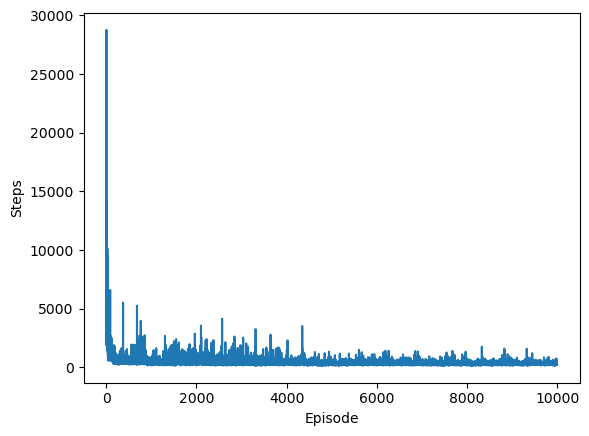

In [70]:
import matplotlib.pyplot as plt

# polt step by episode
plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.show()


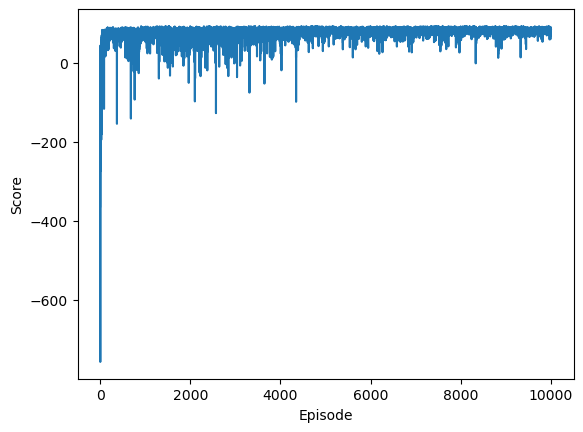

In [71]:
# plot score by episode
plt.plot(scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()

In [78]:
# Testing the agent
n_episodes = 5
score = 0
new_Q_table = create_Q_table(observation_space_steps, action_space_steps)

env = gym.make("MountainCarContinuous-v0", render_mode="human")

for i in range(n_episodes):
    done = False
    truncated = False
    
    observation, info = env.reset()
    state = get_state(observation)
    
    episode_score = 0
    episode_steps = 0
    
    while not done and not truncated:
        
        action_index = max_action_index(new_Q_table, state, action_space)
        action_value = env.action_space.sample()
        
        observation_, reward, done, truncated, info = env.step([action_value])
        state_ = get_state(observation_)
        
        state = state_
        
        episode_score += reward
        episode_steps += 1
        
    print("Episode: ", i)
    print("Score: ", episode_score)
    print("Steps: ", episode_steps)
    
    print("+++++++++++++++++++++++++++++++")
    
    score += episode_score

2646
{((0, 0), 0): 0, ((0, 0), 1): 0, ((0, 0), 2): 0, ((0, 0), 3): 0, ((0, 0), 4): 0, ((0, 0), 5): 0, ((0, 1), 0): 0, ((0, 1), 1): 0, ((0, 1), 2): 0, ((0, 1), 3): 0, ((0, 1), 4): 0, ((0, 1), 5): 0, ((0, 2), 0): 0, ((0, 2), 1): 0, ((0, 2), 2): 0, ((0, 2), 3): 0, ((0, 2), 4): 0, ((0, 2), 5): 0, ((0, 3), 0): 0, ((0, 3), 1): 0, ((0, 3), 2): 0, ((0, 3), 3): 0, ((0, 3), 4): 0, ((0, 3), 5): 0, ((0, 4), 0): 0, ((0, 4), 1): 0, ((0, 4), 2): 0, ((0, 4), 3): 0, ((0, 4), 4): 0, ((0, 4), 5): 0, ((0, 5), 0): 0, ((0, 5), 1): 0, ((0, 5), 2): 0, ((0, 5), 3): 0, ((0, 5), 4): 0, ((0, 5), 5): 0, ((0, 6), 0): 0, ((0, 6), 1): 0, ((0, 6), 2): 0, ((0, 6), 3): 0, ((0, 6), 4): 0, ((0, 6), 5): 0, ((0, 7), 0): 0, ((0, 7), 1): 0, ((0, 7), 2): 0, ((0, 7), 3): 0, ((0, 7), 4): 0, ((0, 7), 5): 0, ((0, 8), 0): 0, ((0, 8), 1): 0, ((0, 8), 2): 0, ((0, 8), 3): 0, ((0, 8), 4): 0, ((0, 8), 5): 0, ((0, 9), 0): 0, ((0, 9), 1): 0, ((0, 9), 2): 0, ((0, 9), 3): 0, ((0, 9), 4): 0, ((0, 9), 5): 0, ((0, 10), 0): 0, ((0, 10), 1): 0, 

/Users/volodimir/anaconda3/envs/Global/lib/python3.11/site-packages/gymnasium/envs/classic_control/continuous_mountain_car.py:172: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reward -= math.pow(action[0], 2) * 0.1
/Users/volodimir/anaconda3/envs/Global/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


TypeError: unhashable type: 'numpy.ndarray'